## prophet 테스트

In [ ]:
import prophet
from prophet import Prophet
import holidays
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet.plot import add_changepoints_to_plot

In [ ]:
# 데이터 호출
df = pd.read_csv("C:/Users/dlwlg/Desktop/final/서울페이+제로페이_ 통합파일전처리/자치구, 일별 데이터 1차 전처리.csv", encoding='cp949')

In [ ]:
# 기존 df에서 칼럼 이름 변경
test_df = df.rename(columns={'날짜': 'ds', '총_결제금액': 'y'})
gangnam_df = test_df[test_df['자치구'] == '강남구']
gangnam_df['ds'] = gangnam_df['ds']
# gangnam_df = gangnam_df[(gangnam_df['ds'] >= '2020-05-01') & (gangnam_df['ds'] <= '2024-03-31')]
gangnam_df = gangnam_df.reset_index(drop=True)

# 결과 확인
print(gangnam_df.head())

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()

min_date = df['ds'].min()
max_date = df['ds'].max()
full_date_range = pd.date_range(start=min_date, end=max_date)

# generate holiday table
holiday_df = pd.DataFrame(columns=['ds','holiday'])
holiday_df['ds'] = sorted(full_date_range)
holiday_df['holiday'] = holiday_df.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')

gangnam_df['cap'] = 1500000000
gangnam_df['floor'] = 0
m = Prophet(seasonality_mode='multiplicative', changepoint_range=0.9, changepoint_prior_scale=0.1, growth='logistic')
m.fit(gangnam_df)

C:\Users\dlwlg\AppData\Local\Temp\ipykernel_23684\2998309162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_df['ds'] = gangnam_df['ds']
16:38:27 - cmdstanpy - INFO - Chain [1] start processing


           ds  자치구    y  총_결제건수
0  2020-01-01  강남구  0.0     0.0
1  2020-01-02  강남구  0.0     0.0
2  2020-01-03  강남구  0.0     0.0
3  2020-01-04  강남구  0.0     0.0
4  2020-01-05  강남구  0.0     0.0


16:38:27 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 1500000000
future['floor'] = 0
forecast = m.predict(future)

In [ ]:
y_true = gangnam_df['y']  # 실제 값 (y)
y_pred = forecast['yhat'][:len(gangnam_df)]  # 예측 값 (yhat), 예측된 값이 gangnam_df의 길이에 맞도록 자름

# 예측한 값과 실제 값 비교 (gangnam_df에서 y가 실제 값이라고 가정)
y_true = gangnam_df['y']  # 실제 값 (y)
y_pred = forecast['yhat'][:len(gangnam_df)]  # 예측 값 (yhat)

# MAE, MSE, RMSE, R^2 계산
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# MAPE 계산
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 69091414.37101096
Mean Squared Error (MSE): 1.045336360335047e+16
Root Mean Squared Error (RMSE): 102241692.09940958
R-squared (R²): 0.30972804868137027
Mean Absolute Percentage Error (MAPE): inf%


In [ ]:
# 실제 값과 예측 값
y_true = gangnam_df['y']  # 실제 값 (y)
y_pred = forecast['yhat'][:len(gangnam_df)]  # 예측 값 (yhat)

# 실제 값과 예측 값의 인덱스가 맞는지 확인 (재정렬)
y_true, y_pred = y_true.align(y_pred, join='inner')

# 실제 값과 예측 값이 0이 아닌 데이터만 필터링
non_zero_mask = (y_true != 0) & (y_pred != 0)  # 실제 값과 예측 값 모두 0이 아닌 데이터만 선택

# 필터링된 데이터는 인덱스가 달라질 수 있으므로, 필터링 후 다시 인덱스를 맞춰줘야 함
y_true_non_zero = y_true[non_zero_mask]
y_pred_non_zero = y_pred[non_zero_mask]

# 만약 필터링 후 y_true_non_zero 또는 y_pred_non_zero가 비어있는 경우 예외 처리
if len(y_true_non_zero) == 0 or len(y_pred_non_zero) == 0:
    print("경고: 필터링 후 데이터가 없습니다.")
else:
    # MAE, MSE, RMSE, R^2 계산 (실제 값과 예측 값이 모두 0이 아닌 데이터에 대해서만)
    mae = mean_absolute_error(y_true_non_zero, y_pred_non_zero)
    mse = mean_squared_error(y_true_non_zero, y_pred_non_zero)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_non_zero, y_pred_non_zero)

    # MAPE 계산 (실제 값과 예측 값이 모두 0이 아닌 데이터에 대해서만)
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100

    # 출력
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print(f"MAPE: {mape}%")


MAE: 64849998.44594191
MSE: 1.0139166808036796e+16
RMSE: 100693429.8156379
R^2: 0.27394694106795403
MAPE: 83.93679836280398%


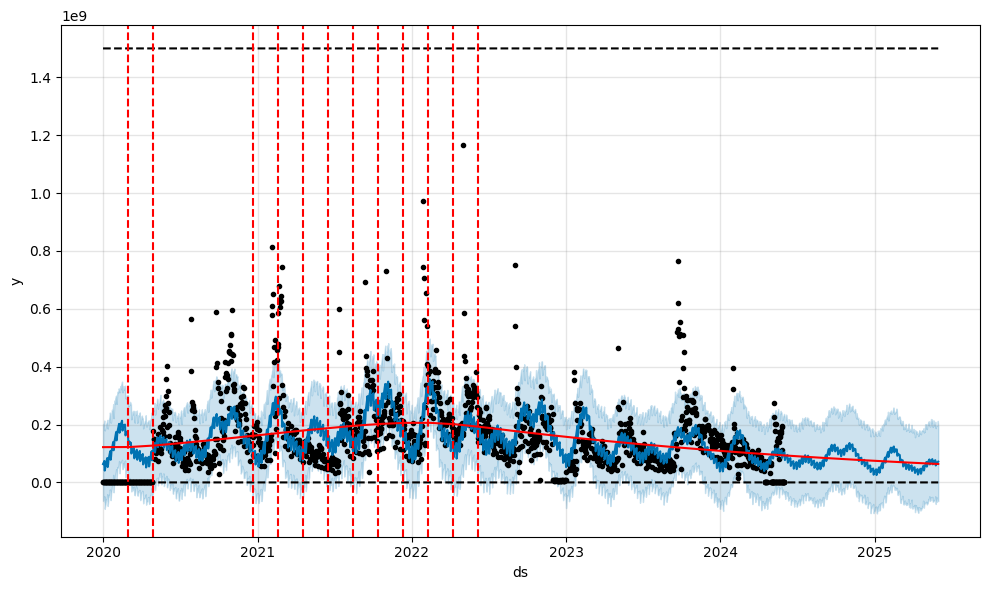

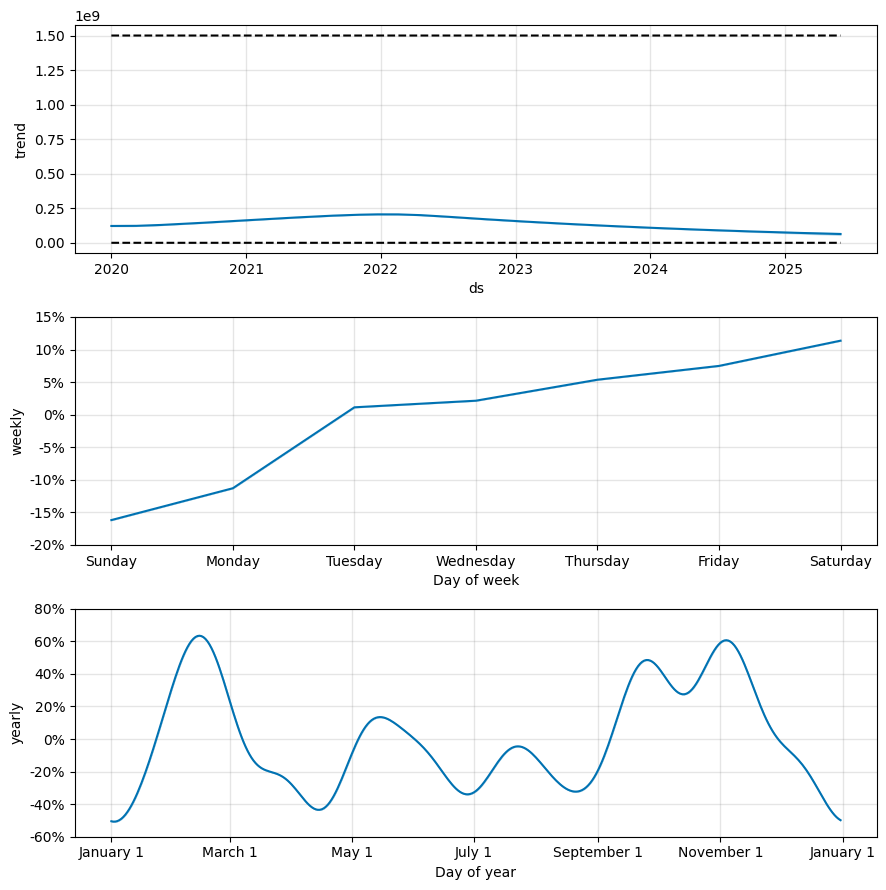

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
fig = m.plot_components(forecast)

In [ ]:
# forecast.to_csv("C:/Users/dlwlg/Desktop/final/서울페이+제로페이_ 통합파일전처리/prophet시도.csv", encoding='cp949', index=False)

## prophet regressor 테스트(시도 중)

In [ ]:
import prophet
from prophet import Prophet
import holidays
import itertools
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 데이터 호출
df = pd.read_csv("C:/Users/dlwlg/Desktop/final/서울페이+제로페이_ 통합파일전처리/자치구, 일별 데이터 1차 전처리.csv", encoding='cp949')

In [ ]:
# 기존 df에서 칼럼 이름 변경
test_df = df.rename(columns={'날짜': 'ds', '총_결제금액': 'y'})
# test_df = test_df[(test_df['ds'] >= '2020-05-01') & (test_df['ds'] <= '2024-03-31')]
test_df = test_df.reset_index(drop=True)

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()

min_date = test_df['ds'].min()
max_date = test_df['ds'].max()
full_date_range = pd.date_range(start=min_date, end=max_date)

# generate holiday table
holiday_df = pd.DataFrame(columns=['ds','holiday'])
holiday_df['ds'] = sorted(full_date_range)
holiday_df['holiday'] = holiday_df.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')

# 자치구 칼럼 인코딩 
label_encoder = LabelEncoder()
test_df['자치구'] = label_encoder.fit_transform(test_df['자치구'])

In [ ]:
# ds, y 외 고려할 feature 추가
regressors = ['자치구', '총_결제건수']
regressors_list = []
for L in range(0, len(regressors)+1):
    for subset in itertools.combinations(regressors, L):
        regressors_list.append(list(subset))

In [ ]:
# 모델 학습 
test_df['cap'] = 1500000000 # 상한값 제한
test_df['floor'] = 0 # 하한값 제한 
m = Prophet(seasonality_mode='multiplicative', changepoint_range=0.9, changepoint_prior_scale=0.1, growth='logistic')

for reg in regressors_list:
    for feature in reg:
        m.add_regressor(feature)
        
m.fit(test_df)

17:22:07 - cmdstanpy - INFO - Chain [1] start processing
17:22:13 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 1500000000
future['floor'] = 0
forecast = m.predict(future)

ValueError: Regressor '총_결제건수' missing from dataframe

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_true = test_df['y']  # 실제 값 (y)
y_pred = forecast['yhat'][:len(test_df)]  # 예측 값 (yhat), 예측된 값이 gangnam_df의 길이에 맞도록 자름

# 예측한 값과 실제 값 비교 (test_df에서 y가 실제 값이라고 가정)
y_true = test_df['y']  # 실제 값 (y)
y_pred = forecast['yhat'][:len(test_df)]  # 예측 값 (yhat)

# MAE, MSE, RMSE, R^2 계산
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# MAPE 계산
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 결과 출력
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 69091414.37101096
Mean Squared Error (MSE): 1.045336360335047e+16
Root Mean Squared Error (RMSE): 102241692.09940958
R-squared (R²): 0.30972804868137027
Mean Absolute Percentage Error (MAPE): inf%


In [ ]:
# MAPE 값은 실제/예측값에 0 들어가면 계산 X. 해당 값들에서 0 제외하고 다시 계산. 
# 실제 값과 예측 값
y_true = test_df['y']  # 실제 값 (y)
y_pred = forecast['yhat'][:len(test_df)]  # 예측 값 (yhat)

# 실제 값과 예측 값의 인덱스가 맞는지 확인 (재정렬)
y_true, y_pred = y_true.align(y_pred, join='inner')

# 실제 값과 예측 값이 0이 아닌 데이터만 필터링
non_zero_mask = (y_true != 0) & (y_pred != 0)  # 실제 값과 예측 값 모두 0이 아닌 데이터만 선택

# 필터링된 데이터는 인덱스가 달라질 수 있으므로, 필터링 후 다시 인덱스를 맞춰줘야 함
y_true_non_zero = y_true[non_zero_mask]
y_pred_non_zero = y_pred[non_zero_mask]

# 만약 필터링 후 y_true_non_zero 또는 y_pred_non_zero가 비어있는 경우 예외 처리
if len(y_true_non_zero) == 0 or len(y_pred_non_zero) == 0:
    print("경고: 필터링 후 데이터가 없습니다.")
else:
    # MAE, MSE, RMSE, R^2 계산 (실제 값과 예측 값이 모두 0이 아닌 데이터에 대해서만)
    mae = mean_absolute_error(y_true_non_zero, y_pred_non_zero)
    mse = mean_squared_error(y_true_non_zero, y_pred_non_zero)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_non_zero, y_pred_non_zero)

    # MAPE 계산 (실제 값과 예측 값이 모두 0이 아닌 데이터에 대해서만)
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100

    # 출력
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    print(f"MAPE: {mape}%")


MAE: 64849998.44594191
MSE: 1.0139166808036796e+16
RMSE: 100693429.8156379
R^2: 0.27394694106795403
MAPE: 83.93679836280398%


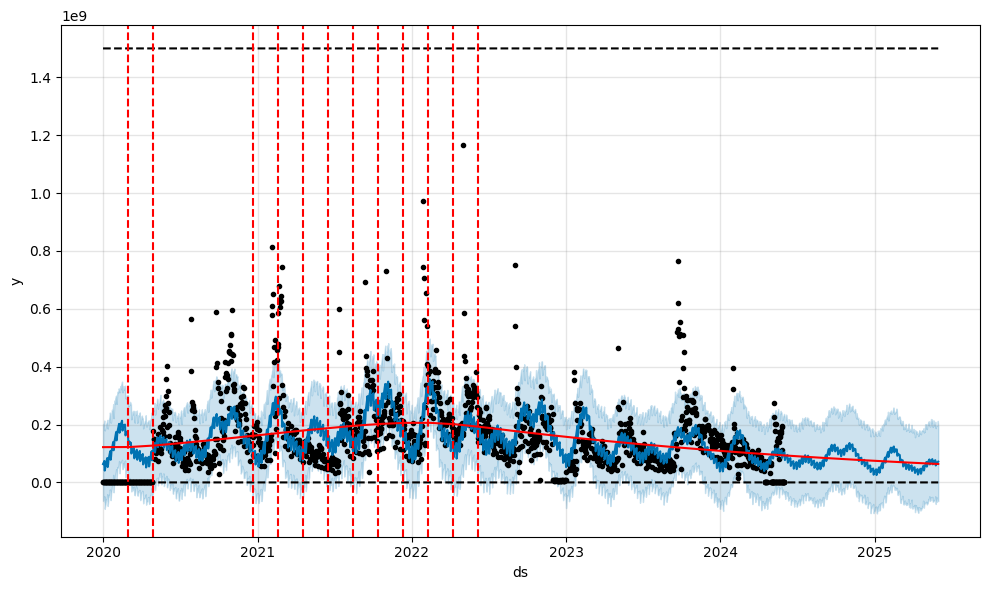

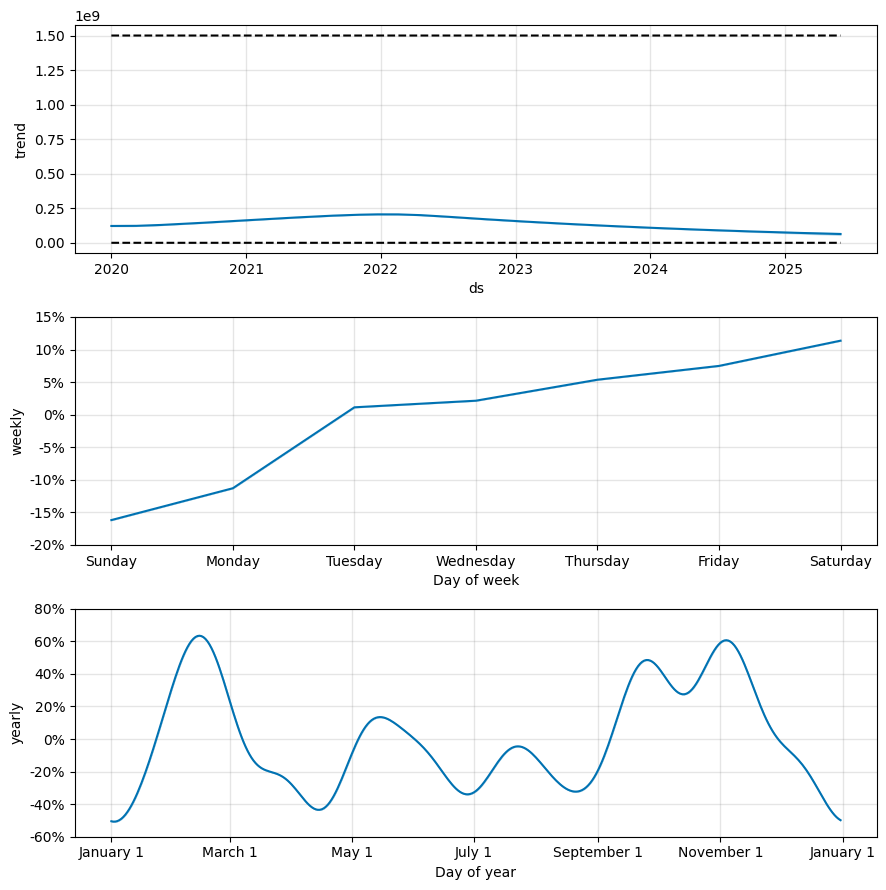

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
fig = m.plot_components(forecast)

In [ ]:
# forecast.to_csv("C:/Users/dlwlg/Desktop/final/서울페이+제로페이_ 통합파일전처리/prophet시도.csv", encoding='cp949', index=False)